<div style="text-align: center;">
<h1> Loan Approval Prediction</h1>
</div>

## Data Loading and import the libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
sns.set(style="whitegrid", palette="muted")

In [19]:
df = pd.read_csv(r"../Datasets/loan_prediction.csv")

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Understanding the data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [22]:
df.shape # size of the dataset

(614, 13)

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [25]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
547,LP002772,Male,No,0,Graduate,No,2526,1783.0,145.0,360.0,1.0,Rural,Y
230,LP001765,Male,Yes,1,Graduate,No,2491,2054.0,104.0,360.0,1.0,Semiurban,Y


## Data Cleaning

In [26]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [27]:
# dropping the unrequired col
df.drop(columns=['Loan_ID'],inplace=True)

In [28]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [29]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
# it will fill the categorical missing value by most frequent values
sim_Imput_for_categorical = SimpleImputer(strategy='most_frequent')

In [31]:
# it will fill the numerical missing value by mean
sim_Imput_for_numerical = SimpleImputer(strategy='mean')

In [32]:
# creating separate list for categorical cols and numerical cols
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [33]:
# applying imputer on categorical
df[categorical_cols] = sim_Imput_for_categorical.fit_transform(df[categorical_cols])

In [34]:
# applying imputer on numerical
df[numerical_cols]   = sim_Imput_for_numerical.fit_transform(df[numerical_cols])

In [35]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis (EDA)

In [36]:
# Summary statistics for numerical features
df[['ApplicantIncome','CoapplicantIncome',
    'LoanAmount','Loan_Amount_Term','Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [37]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [38]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [39]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [40]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [41]:
df['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [42]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [43]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

### Univariate Analysis

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [45]:
#------------------------------------------Categorical columns--------------------------------------------------------------#

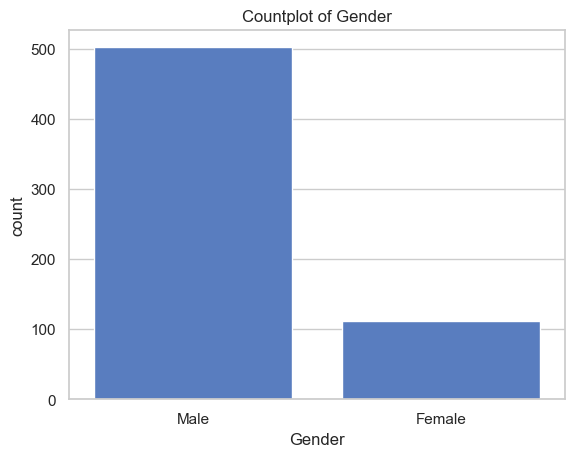

In [46]:
sns.countplot(x='Gender', data=df)
plt.title('Countplot of Gender')
plt.show()


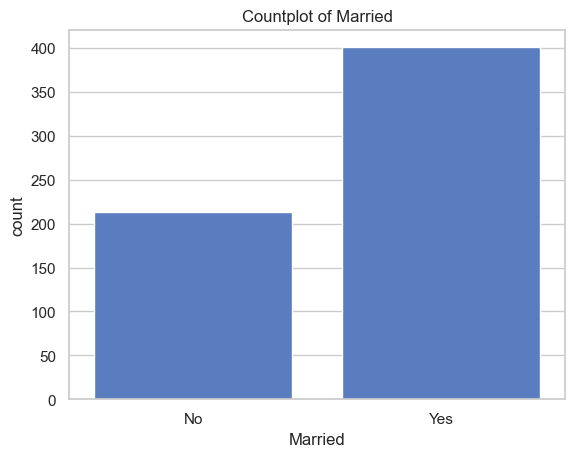

In [47]:
sns.countplot(x='Married', data=df)
plt.title('Countplot of Married')
plt.show()



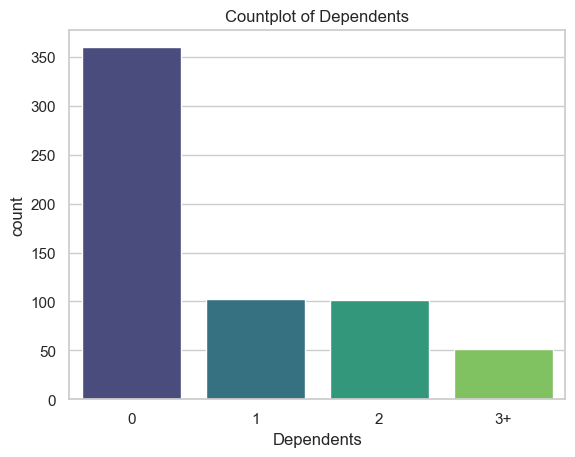

In [48]:
sns.countplot(x='Dependents', data=df,palette='viridis')
plt.title('Countplot of Dependents')
plt.show()


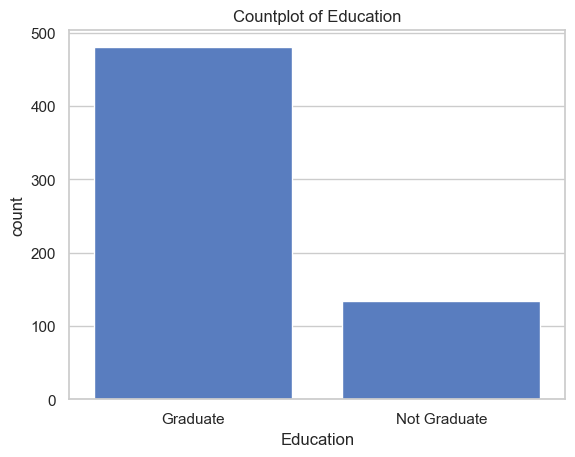

In [49]:
sns.countplot(x='Education', data=df)
plt.title('Countplot of Education')
plt.show()


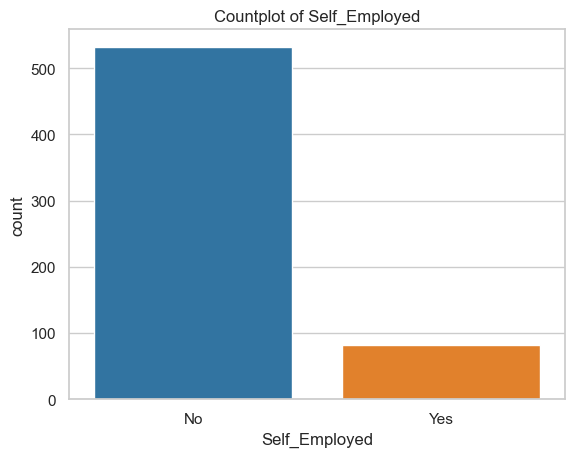

In [50]:
sns.countplot(x='Self_Employed', data=df,palette='tab10')
plt.title('Countplot of Self_Employed')
plt.show()


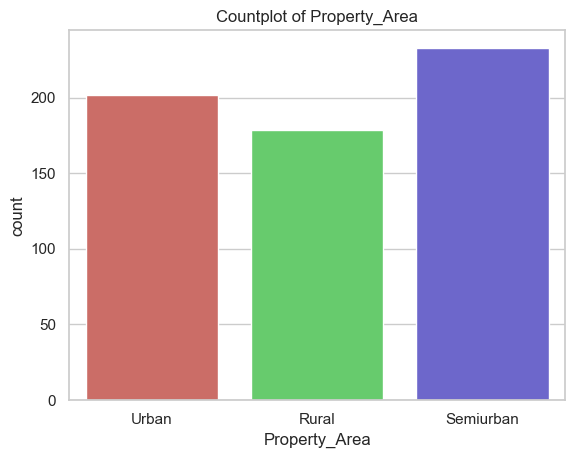

In [51]:
sns.countplot(x='Property_Area', data=df,palette='hls')
plt.title('Countplot of Property_Area')
plt.show()


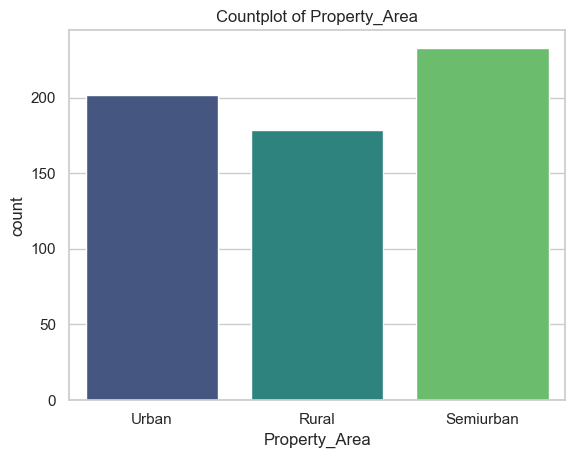

In [52]:
sns.countplot(x='Property_Area', data=df,palette='viridis')
plt.title('Countplot of Property_Area')
plt.show()


In [53]:
#============================================Numerical Col==============================================

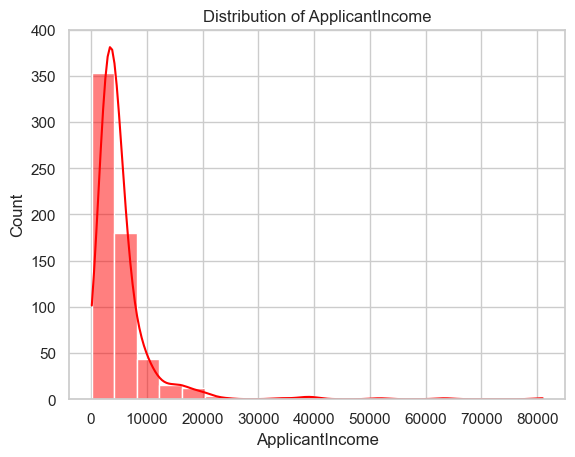

In [54]:
sns.histplot(df['ApplicantIncome'], kde=True, bins=20,color='red')
plt.title('Distribution of ApplicantIncome')
plt.show()


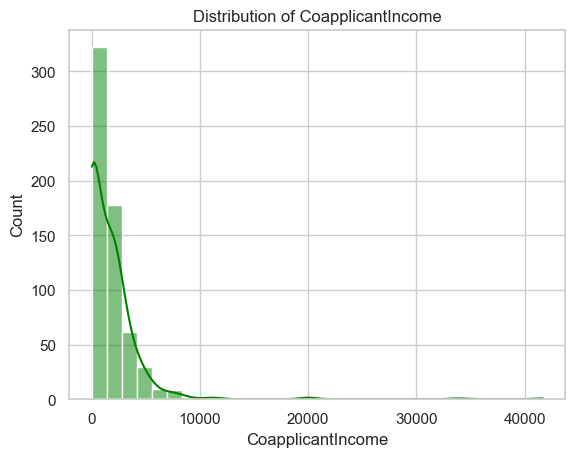

In [55]:
sns.histplot(df['CoapplicantIncome'], kde=True, bins=30,color="green")
plt.title('Distribution of CoapplicantIncome')
plt.show()


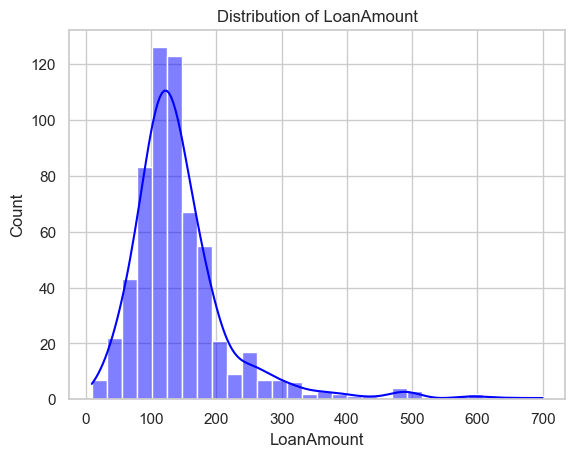

In [56]:
sns.histplot(df['LoanAmount'], kde=True, bins=30,color='blue')
plt.title('Distribution of LoanAmount')
plt.show()


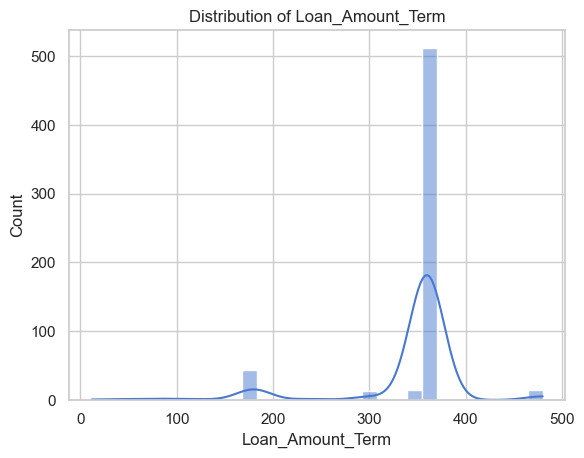

In [57]:
sns.histplot(df['Loan_Amount_Term'], kde=True, bins=30)
plt.title('Distribution of Loan_Amount_Term')
plt.show()


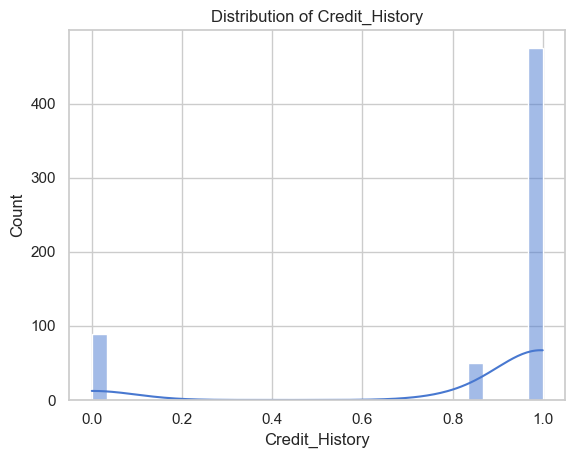

In [58]:

sns.histplot(df['Credit_History'], kde=True, bins=30)
plt.title('Distribution of Credit_History')
plt.show()


### Bivariate Analysis

In [59]:
#------------------------------Categorical vs Target-------------------------------------------

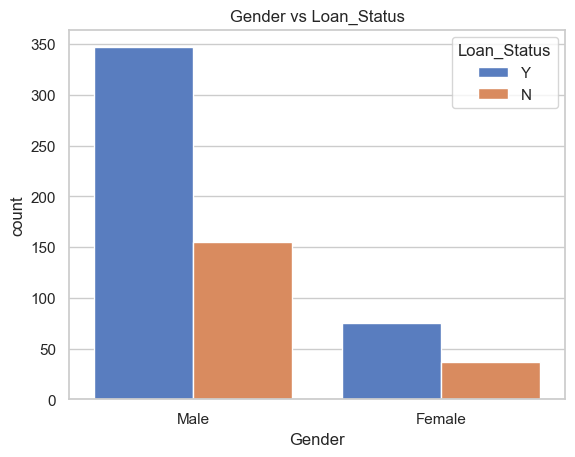

In [60]:

sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs Loan_Status')
plt.show()


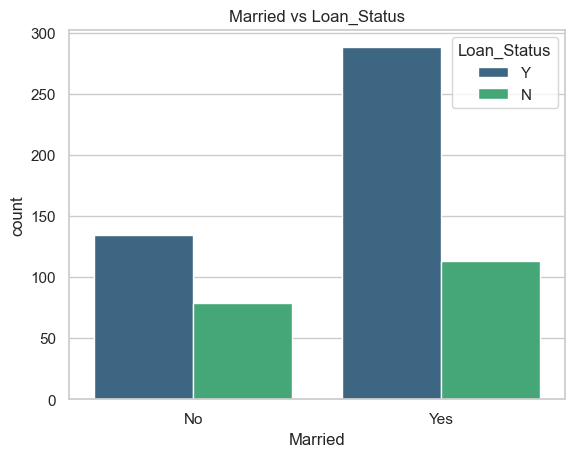

In [61]:
sns.countplot(x='Married', hue='Loan_Status', data=df,palette='viridis')
plt.title('Married vs Loan_Status')
plt.show()


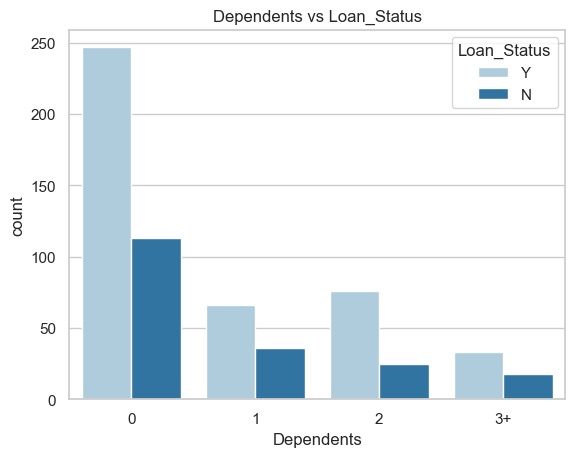

In [62]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df,palette='Paired')
plt.title('Dependents vs Loan_Status')
plt.show()


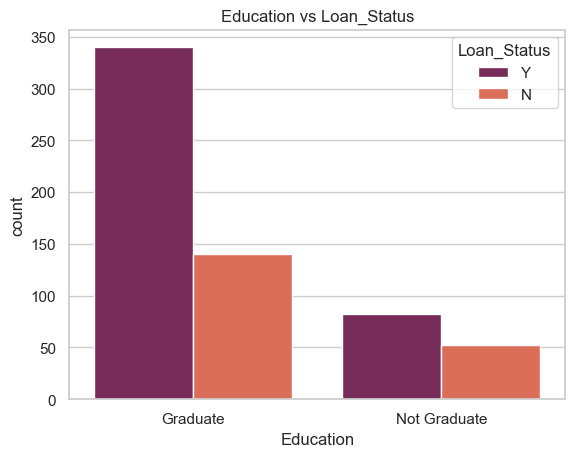

In [63]:
sns.countplot(x='Education', hue='Loan_Status', data=df,palette='rocket')
plt.title('Education vs Loan_Status')
plt.show()


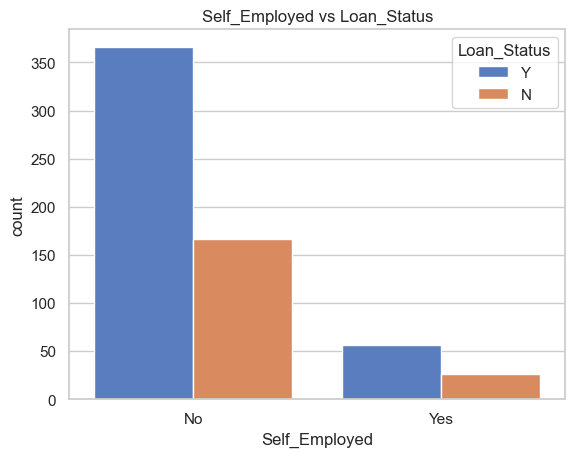

In [64]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Self_Employed vs Loan_Status')
plt.show()


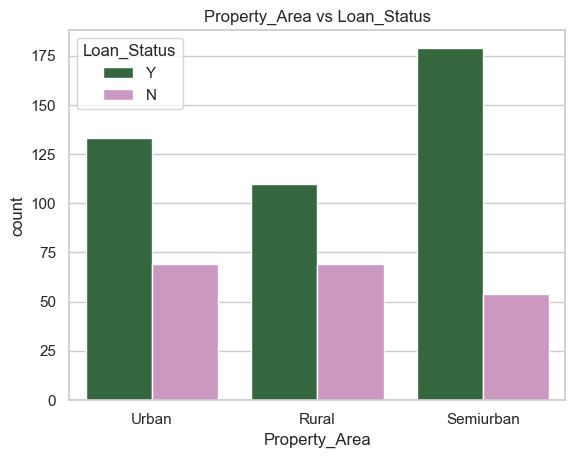

In [65]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df,palette='cubehelix')
plt.title('Property_Area vs Loan_Status')
plt.show()


In [66]:
#-----------------------------------------Numerical vs Targe-----------------------------------------

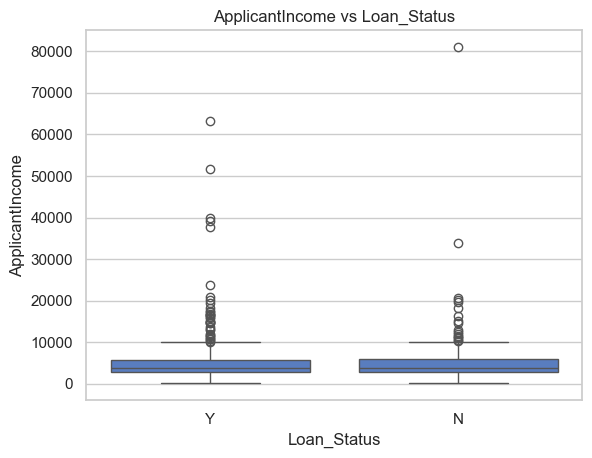

In [67]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('ApplicantIncome vs Loan_Status')
plt.show()


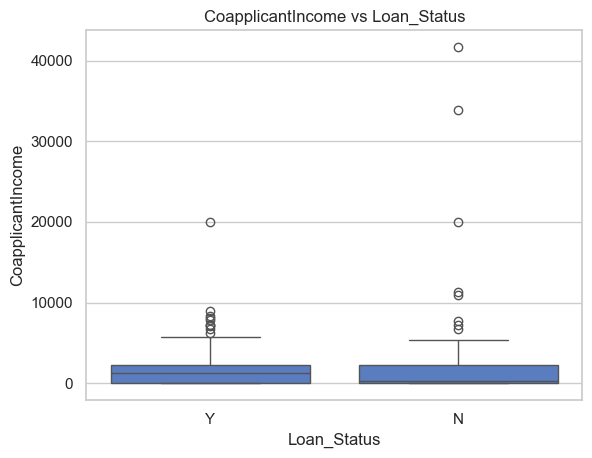

In [68]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('CoapplicantIncome vs Loan_Status')
plt.show()


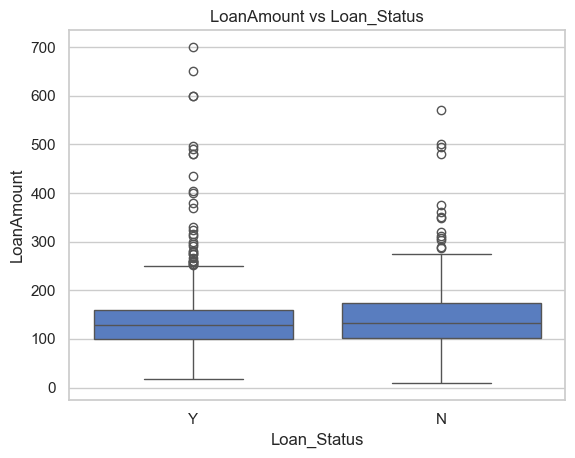

In [69]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('LoanAmount vs Loan_Status')
plt.show()


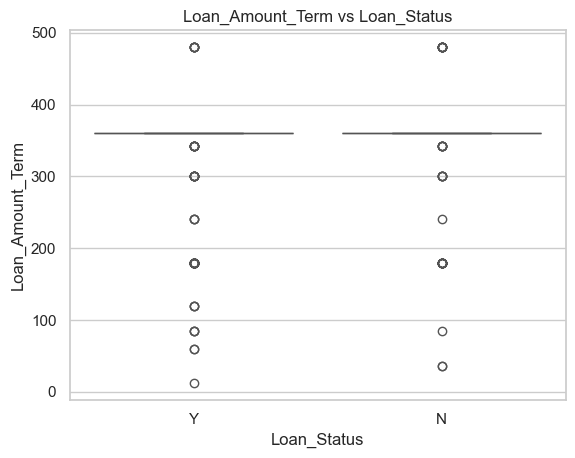

In [70]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df)
plt.title('Loan_Amount_Term vs Loan_Status')
plt.show()


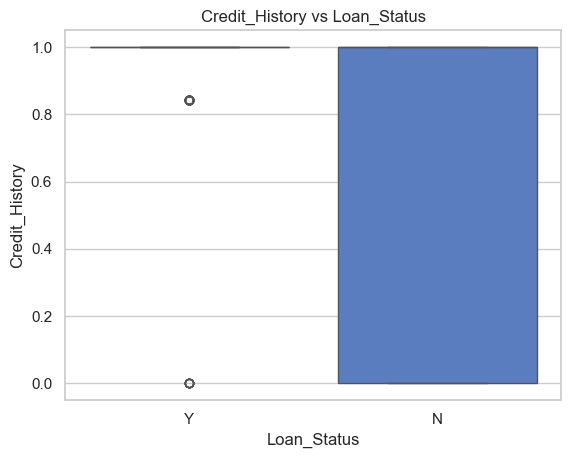

In [71]:

sns.boxplot(x='Loan_Status', y='Credit_History', data=df)
plt.title('Credit_History vs Loan_Status')
plt.show()


### Multivariate Analysis

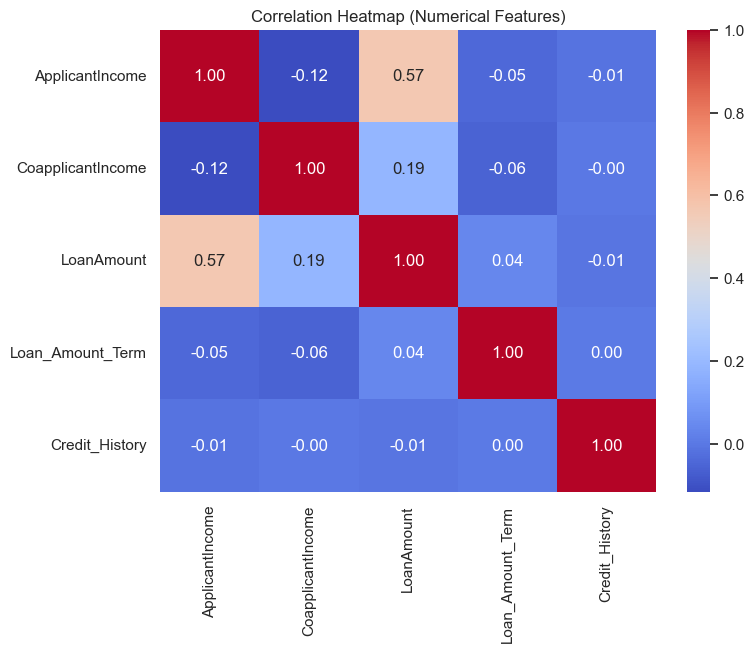

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


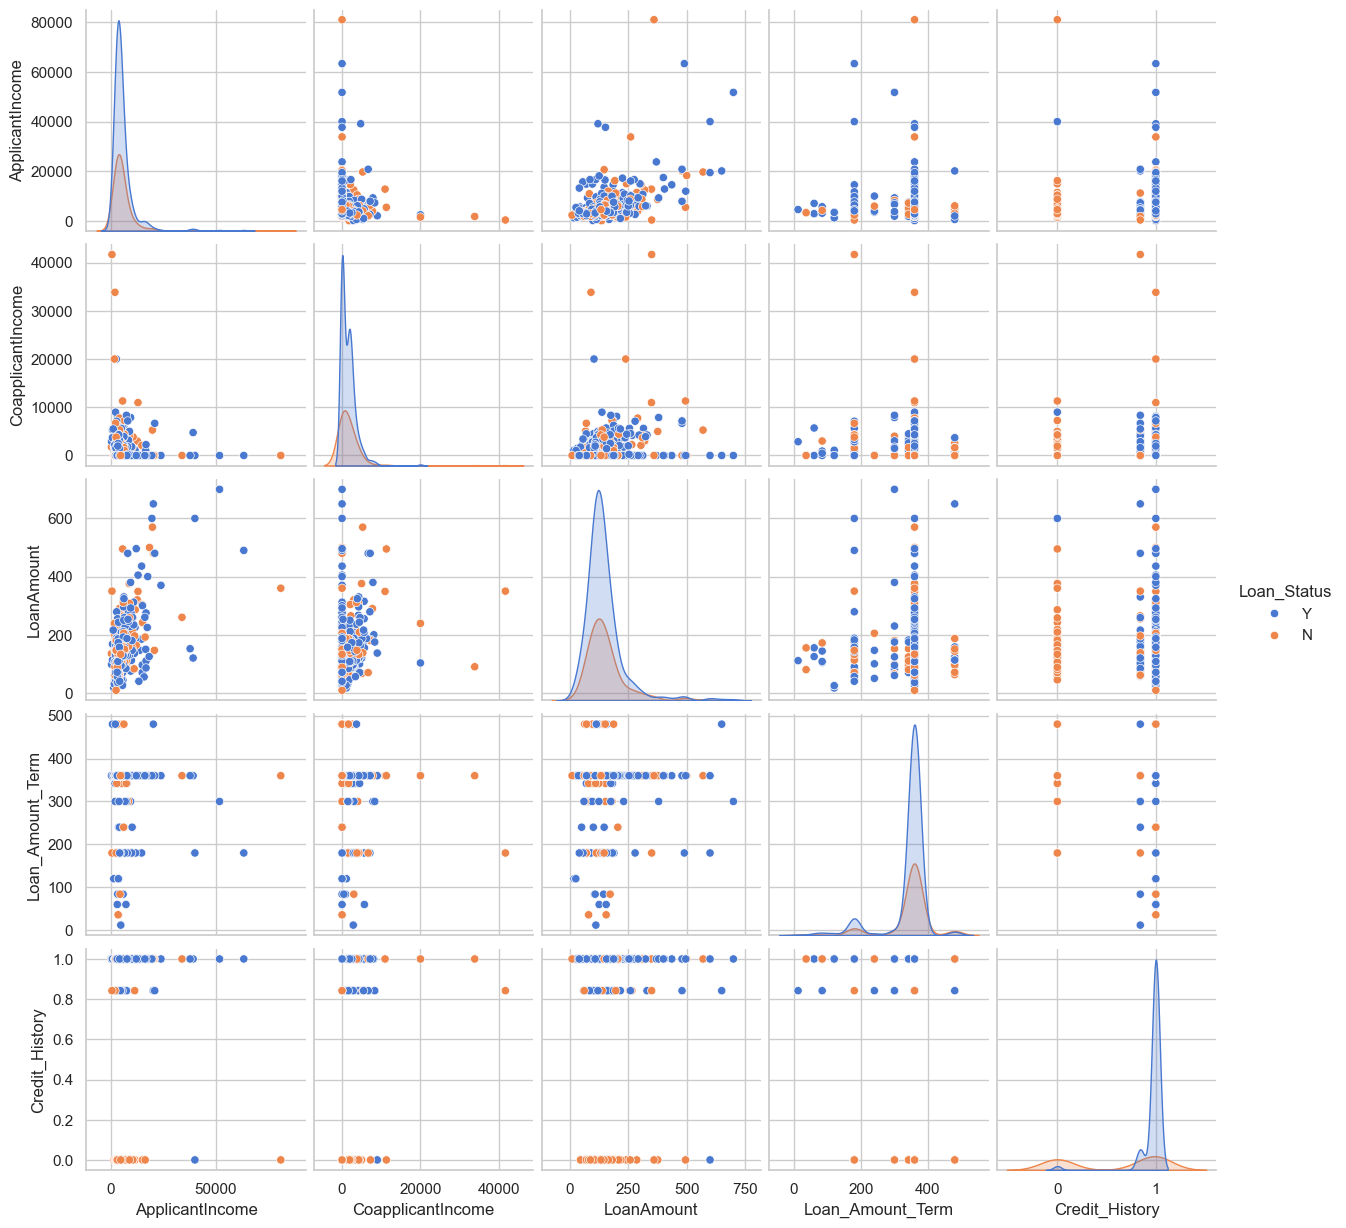

In [73]:
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount',
                 'Loan_Amount_Term','Credit_History','Loan_Status']],
             hue='Loan_Status')
plt.show()


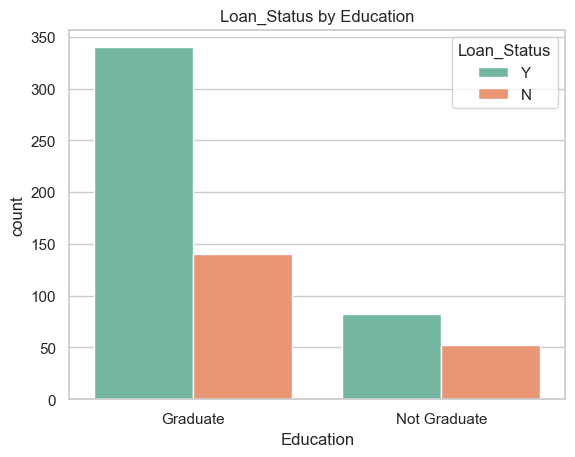

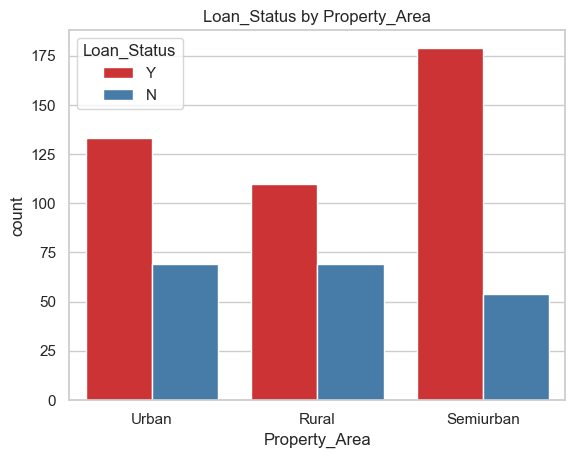

In [74]:
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan_Status by Education')
plt.show()

sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='Set1')
plt.title('Loan_Status by Property_Area')
plt.show()


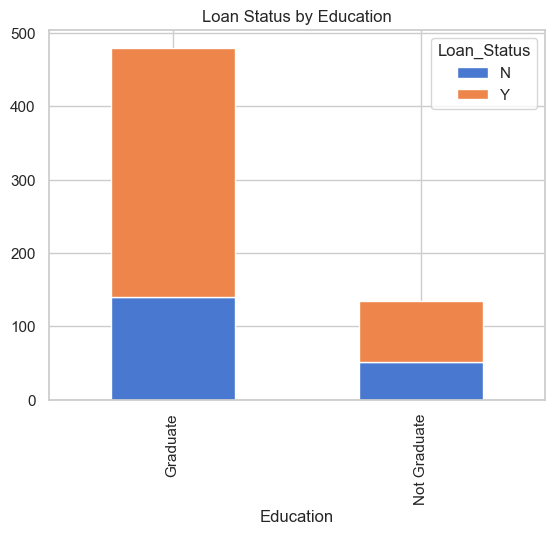

In [75]:
pd.crosstab(df['Education'], df['Loan_Status']).plot(kind='bar', stacked=True)
plt.title('Loan Status by Education')
plt.show()

## Feature Engineering

In [76]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [77]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Create the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)


In [80]:
# for neural network
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [81]:
label_encoder = LabelEncoder()

# Fit and transform target
y_train_transformed = label_encoder.fit_transform(y_train)
y_test_transformed = label_encoder.transform(y_test)

## Model Building

### Random Forest

In [82]:
random_forest_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('rf_classifier', RandomForestClassifier())
])

In [83]:
random_forest_pipeline.fit(X_train, y_train_transformed)


,steps,"[('preprocessing', ...), ('rf_classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [84]:
y_pred_rf = random_forest_pipeline.predict(X_test)


In [85]:
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

### Logistic Regression

In [86]:
Logistic_Regression_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('lr_classifier',LogisticRegression())
])

In [87]:
Logistic_Regression_pipeline.fit(X_train,y_train_transformed)

,steps,"[('preprocessor', ...), ('lr_classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [88]:
y_pred_lr = Logistic_Regression_pipeline.predict(X_test)

In [89]:
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Decision Tree

In [90]:
DecisionTree_Classifier_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ('dt_classifier',DecisionTreeClassifier())
])

In [91]:
DecisionTree_Classifier_pipeline.fit(X_train,y_train_transformed)

,steps,"[('preprocessor', ...), ('dt_classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [92]:
dt_y_pred = DecisionTree_Classifier_pipeline.predict(X_test)

In [93]:
dt_y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

### Support Vector Machine

In [94]:
svm_pipeline = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('svm',SVC())
    ]
)

In [95]:
svm_pipeline.fit(X_train,y_train_transformed)

,steps,"[('preprocessor', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [96]:
svm_y_pred = svm_pipeline.predict(X_test)

In [97]:
svm_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

### K-Nearest-Neighbour

In [98]:
KNN_pipeline = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('KNN',KNeighborsClassifier())
    ]
)

In [99]:
KNN_pipeline.fit(X_train,y_train_transformed)

,steps,"[('preprocessor', ...), ('KNN', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [100]:
KNN_y_pred = KNN_pipeline.predict(X_test)

In [101]:
KNN_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### AdaBoost

In [102]:
adb_pipeline = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('adb',AdaBoostClassifier())
    ]
)

In [103]:
adb_pipeline.fit(X_train,y_train_transformed)

,steps,"[('preprocessor', ...), ('adb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [104]:
adb_y_pred = adb_pipeline.predict(X_test)

In [105]:
adb_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Model Evaluation

In [106]:
models_predictions = {
    'Random Forest': y_pred_rf,
    'Logistic Regression': y_pred_lr,
    'Decision Tree': dt_y_pred,
    'SVM': svm_y_pred,
    'KNN': KNN_y_pred,
    'AdaBoost': adb_y_pred
}

In [109]:
accuracy_scores = {}
for model_name, y_pred in models_predictions.items():
    accuracy_scores[model_name] = accuracy_score(y_test_transformed, y_pred)
    print(f"{model_name} Accuracy: {accuracy_scores[model_name]:.4f}")

Random Forest Accuracy: 0.7480
Logistic Regression Accuracy: 0.7886
Decision Tree Accuracy: 0.7317
SVM Accuracy: 0.7805
KNN Accuracy: 0.7642
AdaBoost Accuracy: 0.7886
